In [ ]:
!pip install contextily

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
gdf_inscriptions = pd.read_csv("gdf_inscriptions_chypre.csv")
gdf_settlement = pd.read_csv("gdf_settlement_ecriture.csv")

In [ ]:
import re

def top_mots_colonne(df, nom_colonne, top_n=100):
    pd.set_option('display.max_rows', 100)
    texte = df[nom_colonne].astype(str).str.lower()

    texte = texte.apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

    mots = texte.str.split().explode()

    stopwords = {'of', 'and', 'the', 'to', 'in', 'on', 'a', 'is', 'for', 'from', 'by', 'at'}
    mots_filtres = mots[~mots.isin(stopwords)]

    return mots_filtres.value_counts().head(top_n)

frequence_mots_materiau = top_mots_colonne(gdf_inscriptions, 'Nature')
print(frequence_mots_materiau)

Nature
epitaph           2118
signs             1652
no                1430
interpretation    1428
1                 1405
dedication        1166
2                 1072
son               1054
3                  786
honors             710
4                  611
sign               499
pn                 470
daughter           349
nymph              306
onesagoras         262
demetrios          216
his                200
gen                191
ptolemy            178
aphrodite          163
erected            144
apollonios         140
paphos             138
epitaphs           135
epigram            135
apollo             134
wife               129
coinage            125
s                  124
her                124
philadelphos       122
ii                 122
5                  113
mentions           106
honor               97
zeus                96
arsinoe             92
timagoras           90
ariston             89
king                87
melanthios          84
stasiwoikos         82
buil

Reconnaissance d'entités nommées dans la colonne Nature

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import numpy as np

theonymes = {
    'Aphrodite': ['aphrodite', 'paphian', 'cypris', 'goddess'],
    'Astarte': ['astarte'],
    'Melqart': ['melqart', 'melkart'],
    'Reshep': ['reshep', 'reshef', 'rashap', 'rashaf'],
    'Apollo': ['apollo', 'hylates'],
    'Zeus': ['zeus', 'olympios'],
    'Artemis': ['artemis'],
    'Nymph': ['nymph'],
    'Hermes': ['hermes'],
    'Dionysos': ['dionysos'],
    'Serapis/Isis': ['serapis', 'isis', 'sarapis'],
    'Asclepios': ['asclepios', 'esmun'],
    'Arsinoe': ['arsinoe']
}

def detecter_divinite(text):
    t = str(text).lower()
    for dieu, mots_cles in theonymes.items():
        if any(m in t for m in mots_cles):
            return dieu
    return None

gdf_inscriptions['Divinite'] = gdf_inscriptions['Nature'].apply(detecter_divinite)
df_cultes = gdf_inscriptions.dropna(subset=['Divinite'])
df_cultes

Inscription #     Type  \
130   Semitica 32 (1982) 45-49,pl.VII.1 \r=ICS #343:...       CS   
139              SEG 31 (1981) #1371\r=ICA 20(1980) #1k       GA   
183                     Annuario 31-32 (1969-70) 367 #3       GA   
193   ICA 32 (1992) #5F\r=BSA 56 (1961) #12 (7)\r\r=...       GA   
213            JHS 66 (1946) 32 #10\r=BE 62 (1949) #205       GA   
...                                                 ...      ...   
9511                                       Kafizin #269  CS & GA   
9512                                       Kafizin #271  CS & GA   
9513                                       Kafizin #275  CS & GA   
9551  CIS pl.VIII\r=ICS #1: pp.95-6\r=SEG 20 (1964) ...  CS & GA   
9552  CIS pl.VIII\r=ICS #1: pp.95-6\r=SEG 20 (1964) ...  CS & GA   

                            Place         Date  \
130                Lebanon: Sidon          NaN   
139                        Cyprus          NaN   
183                        Cyprus          NaN   
193                        Cyprus  Hellenistic   
213                        Cyprus        Roman   
...                           ...          ...   
9511             Nicosia: Kafizin  Hellenistic   
9512             Nicosia: Kafizin  Hellenistic   
9513             Nicosia: Kafizin  Hellenistic   
9551  Paphos: Nea Paphos "Loukki"  Hellenistic   
9552  Paphos: Nea Paphos "Loukki"  Hellenistic   

                                                 Nature  \
130                 Dedication to a goddess (Astarte?).   
139   Epitaph of Apollonides.\r\r\rFormula: mnemes c...   
183                          PN: Apollo son of Paratos.   
193   Dedication by Onesitimos, \rpriest of Arsinoe ...   
213                        Dedication to Zeus Olympios.   
...                                                 ...   
9511  Dedication to the Nymph \rby Onesagoras. \rFro...   
9512           Dedication to the Nymph \rby Onesagoras.   
9513  Dedication to the Nymph by Onesagoras, in comp...   
9551  Nikokles, king of Paphos, \rdedicates a temple...   
9552  Nikokles, king of Paphos, \rdedicates a temple...   

                                        Material Place_Region Place_precision  \
130                                Marble stele.      Lebanon             NaN   
139                            Limestone cippus.       Cyprus             NaN   
183                           Lead sling bullet.       Cyprus             NaN   
193                                 Marble drum.       Cyprus             NaN   
213                      Marble plaque or stele.       Cyprus             NaN   
...                                          ...          ...             ...   
9511        Terracotta vase: plain ware pitcher.      Nicosia             NaN   
9512        Terracotta vase: plain ware pitcher.      Nicosia             NaN   
9513  Terracotta vase: plain ware jug (hyrdion).      Nicosia             NaN   
9551              Limestone (or marble?) tablet.       Paphos          Loukki   
9552              Limestone (or marble?) tablet.       Paphos          Loukki   

         Site            Precision_Date  ... trismegistos_id  coordinates  \
130     Sidon                       NaN  ...             NaN          NaN   
139       NaN                       NaN  ...             NaN          NaN   
183       NaN                       NaN  ...             NaN          NaN   
193       NaN       2nd BC (Ptolemy VI)  ...             NaN          NaN   
213       NaN                    2nd AD  ...             NaN          NaN   
...       ...                       ...  ...             ...          ...   
9511  Kafizin  3rd BC (225/24 & 223/22)  ...             NaN          NaN   
9512  Kafizin           3rd BC (225/18)  ...             NaN          NaN   
9513  Kafizin           3rd BC (224/23)  ...             NaN          NaN   
9551   Paphos     late 4thBC (325-309?)  ...             NaN          NaN   
9552   Paphos     late 4thBC (325-309?)  ...             NaN          NaN   

       latitude  

/tmp/ipython-input-1935534714.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)


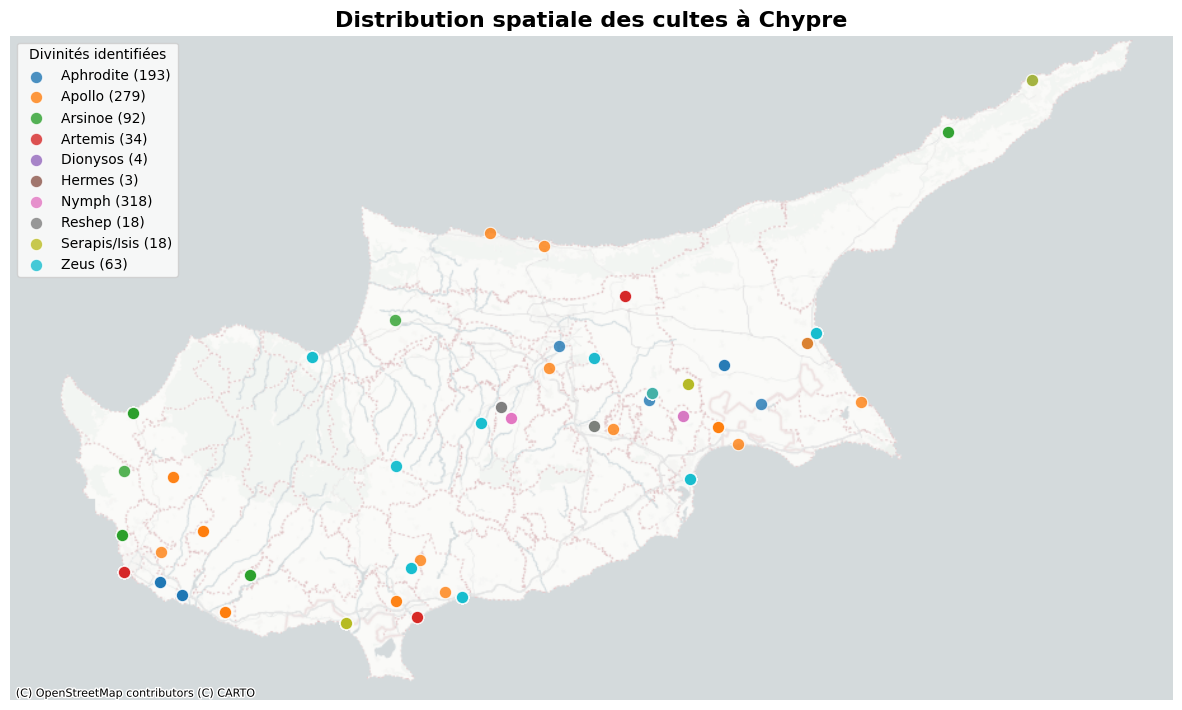

In [ ]:

if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)

    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")
else:
    if df_cultes.crs != "EPSG:3857":
        df_cultes = df_cultes.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 12), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

try:
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)
except:
    ax.set_facecolor('#f0f0f0')

divinites_presentes = sorted(df_cultes['Divinite'].unique())
colormap = plt.get_cmap('tab10')
mapping_couleurs = {div: colormap(i % 10) for i, div in enumerate(divinites_presentes)}

for div in divinites_presentes:
    subset = df_cultes[df_cultes['Divinite'] == div]
    if not subset.empty:
        ax.scatter(
            subset.geometry.x, subset.geometry.y,
            color=mapping_couleurs[div],
            s=80,
            alpha=0.8,
            edgecolors='white',
            linewidth=0.8,
            label=f"{div} ({len(subset)})",
            zorder=3
        )

ax.legend(title="Divinités identifiées", loc='upper left', frameon=True, fontsize=10)
ax.set_title("Distribution spatiale des cultes à Chypre", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

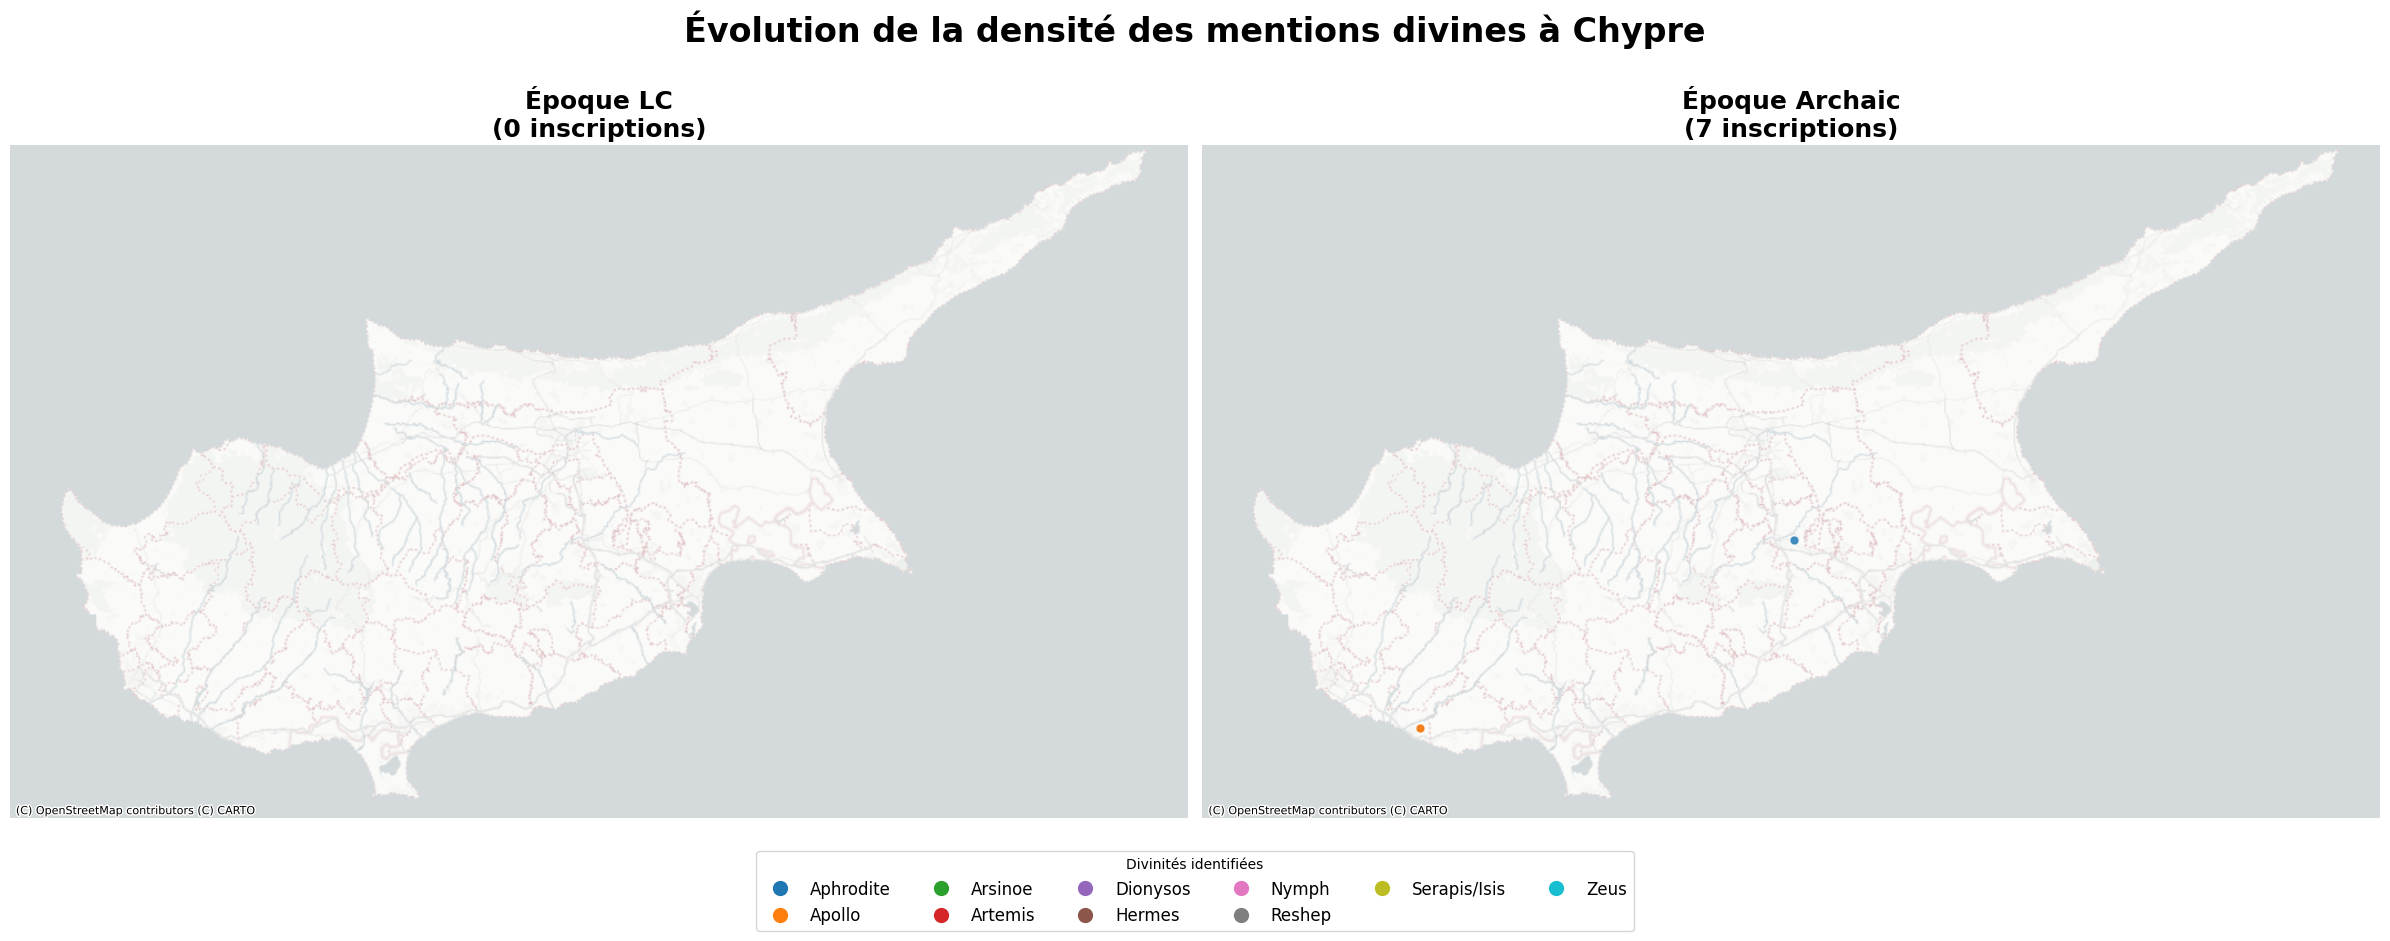

In [ ]:


if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

epoques = ['LC', 'Archaic']

divinites_global = sorted(df_cultes['Divinite'].unique())
colormap = plt.get_cmap('tab10')
mapping_couleurs = {div: colormap(i % 10) for i, div in enumerate(divinites_global)}

fig, axes = plt.subplots(1, 2, figsize=(24, 10), facecolor='white')
axes = axes.flatten()

for i, epoque in enumerate(epoques):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.set_xlim(3580000, 3860000)
    ax.set_ylim(4100000, 4260000)

    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

    df_ep = df_cultes[df_cultes['Date'] == epoque]

    if not df_ep.empty:
        for div in divinites_global:
            subset = df_ep[df_ep['Divinite'] == div]
            if not subset.empty:
                ax.scatter(
                    subset.geometry.x, subset.geometry.y,
                    color=mapping_couleurs[div],
                    s=40,
                    alpha=0.6,
                    edgecolors='white',
                    linewidth=0.5,
                    zorder=3
                )

    ax.set_title(f"Époque {epoque}\n({len(df_ep)} inscriptions)", fontsize=18, fontweight='bold')
    ax.set_axis_off()

patches = [plt.plot([],[], marker="o", ms=12, ls="", mec='white',
            color=mapping_couleurs[d], label=d)[0] for d in divinites_global]

fig.legend(handles=patches, title="Divinités identifiées", loc='lower center',
           ncol=len(divinites_global)//2 + 1, bbox_to_anchor=(0.5, 0.05), fontsize=12)

plt.suptitle("Évolution de la densité des mentions divines à Chypre", fontsize=24, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.12, 1, 0.95])
plt.show()

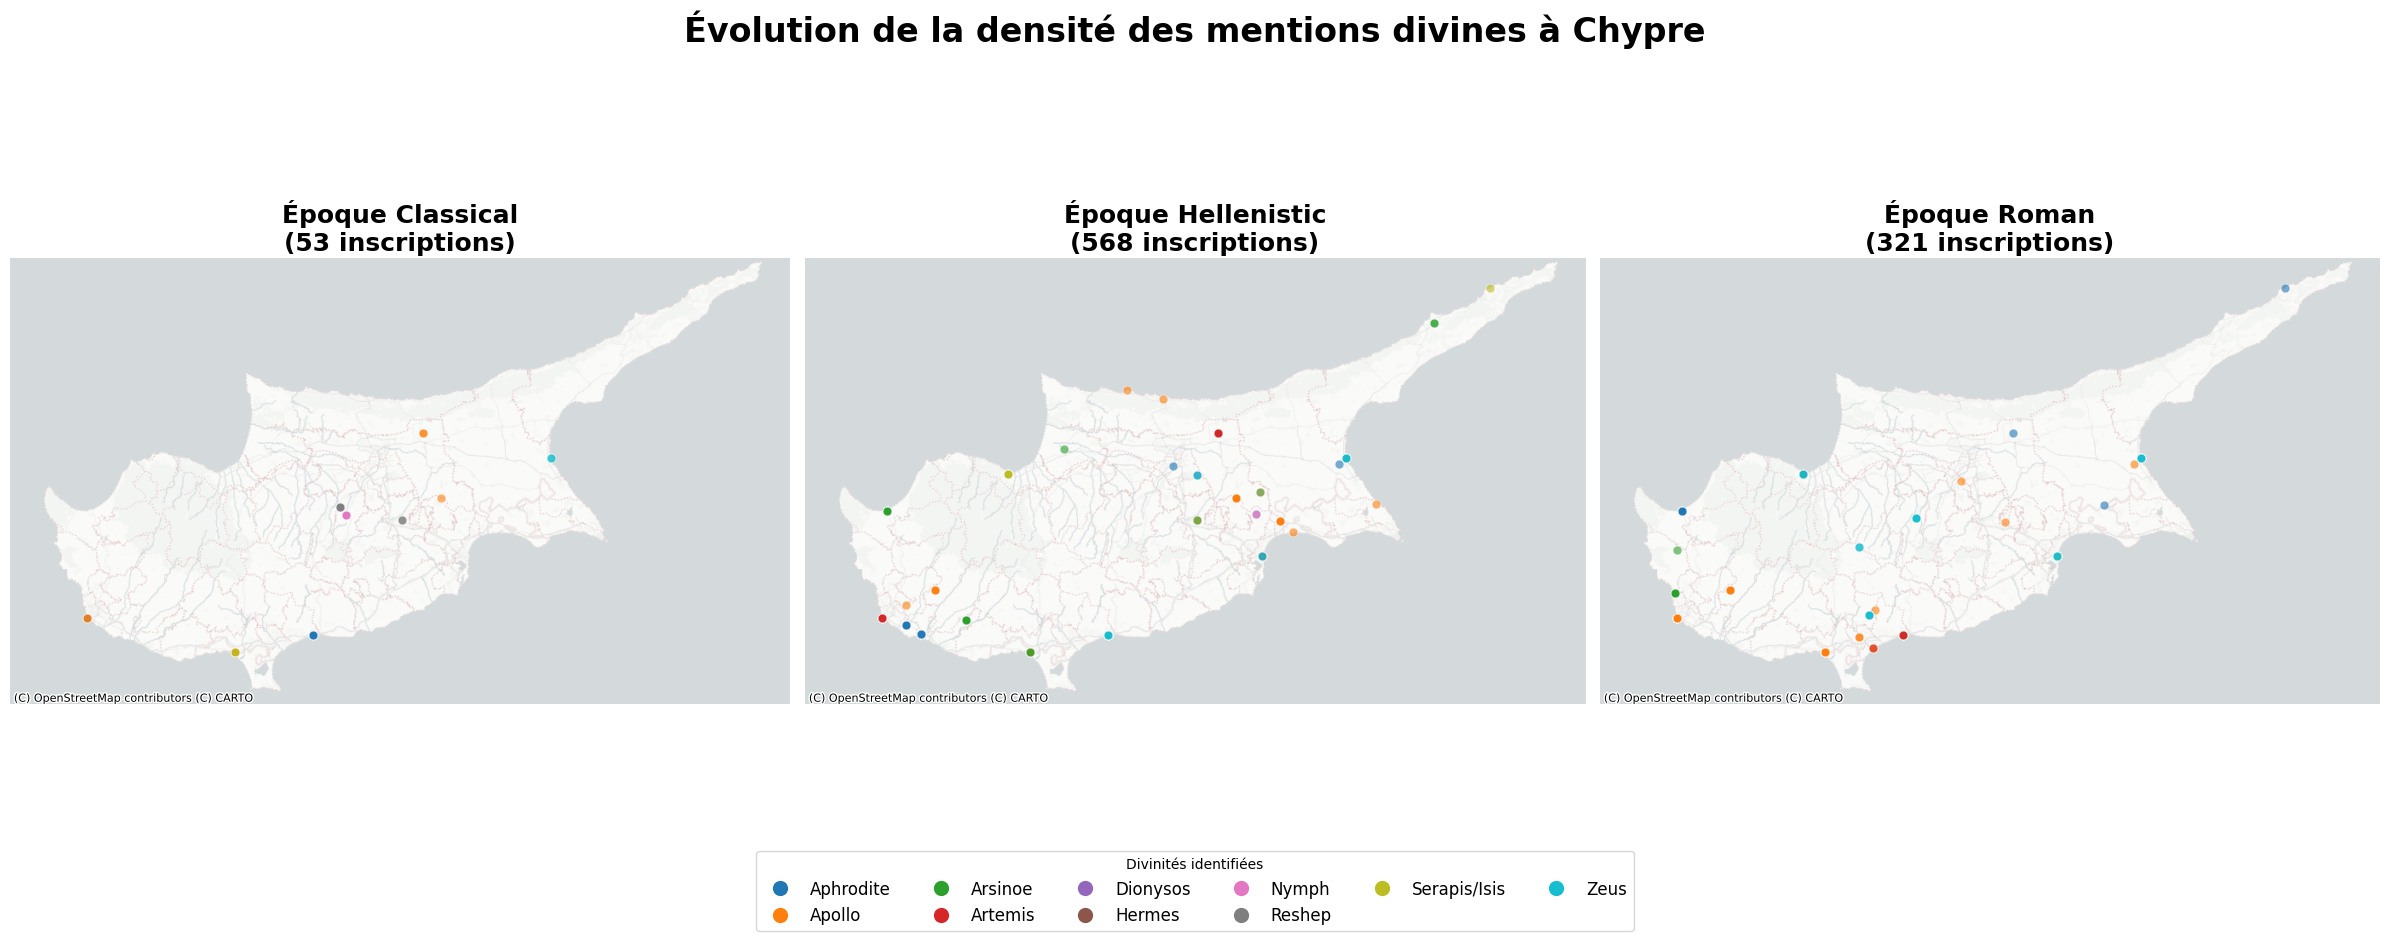

In [ ]:


if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

epoques = ['Classical', 'Hellenistic', 'Roman']

divinites_global = sorted(df_cultes['Divinite'].unique())
colormap = plt.get_cmap('tab10')
mapping_couleurs = {div: colormap(i % 10) for i, div in enumerate(divinites_global)}

fig, axes = plt.subplots(1, 3, figsize=(24, 10), facecolor='white')
axes = axes.flatten()

for i, epoque in enumerate(epoques):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.set_xlim(3580000, 3860000)
    ax.set_ylim(4100000, 4260000)

    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

    df_ep = df_cultes[df_cultes['Date'] == epoque]

    if not df_ep.empty:
        for div in divinites_global:
            subset = df_ep[df_ep['Divinite'] == div]
            if not subset.empty:
                ax.scatter(
                    subset.geometry.x, subset.geometry.y,
                    color=mapping_couleurs[div],
                    s=40,
                    alpha=0.6,
                    edgecolors='white',
                    linewidth=0.5,
                    zorder=3
                )

    ax.set_title(f"Époque {epoque}\n({len(df_ep)} inscriptions)", fontsize=18, fontweight='bold')
    ax.set_axis_off()

patches = [plt.plot([],[], marker="o", ms=12, ls="", mec='white',
            color=mapping_couleurs[d], label=d)[0] for d in divinites_global]

fig.legend(handles=patches, title="Divinités identifiées", loc='lower center',
           ncol=len(divinites_global)//2 + 1, bbox_to_anchor=(0.5, 0.05), fontsize=12)

plt.suptitle("Évolution de la densité des mentions divines à Chypre", fontsize=24, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.12, 1, 0.95])
plt.show()

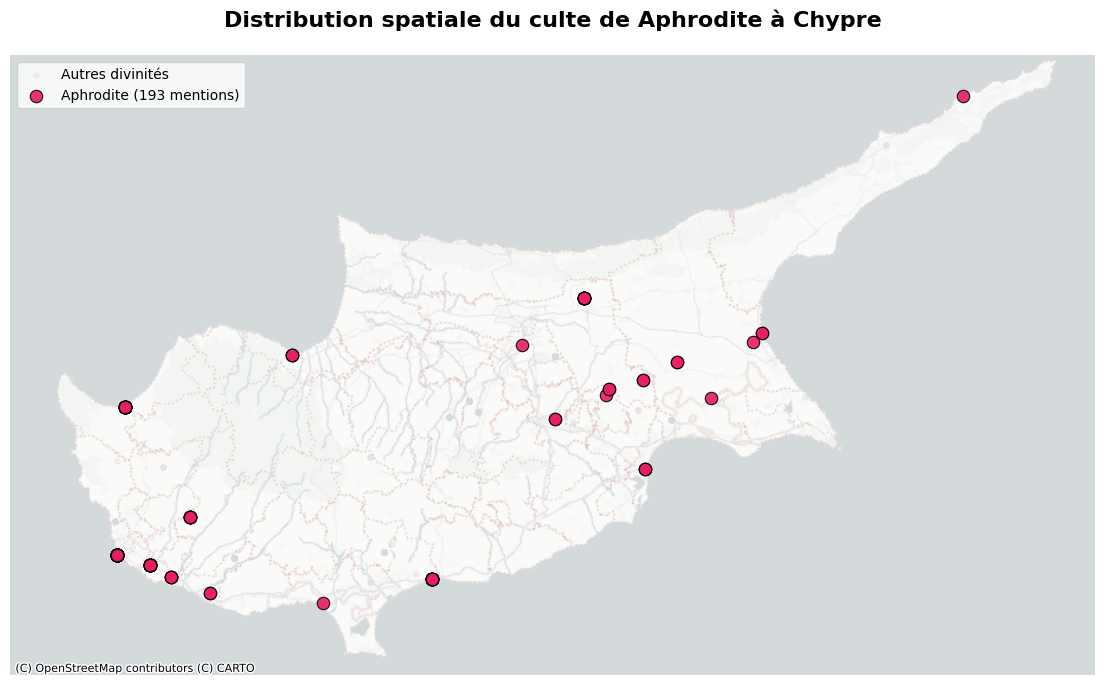

In [ ]:


divinite_cible = "Aphrodite"
couleur_focus = "#e91e63"

if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

ax.scatter(
    df_cultes.geometry.x, df_cultes.geometry.y,
    color='#d5dbdb', s=15, alpha=0.3, label='Autres divinités', zorder=1
)

subset = df_cultes[df_cultes['Divinite'] == divinite_cible]

if not subset.empty:
    ax.scatter(
        subset.geometry.x, subset.geometry.y,
        color=couleur_focus,
        s=80,
        alpha=0.9,
        edgecolors='black',
        linewidth=0.8,
        label=f"{divinite_cible} ({len(subset)} mentions)",
        zorder=3
    )
else:
    print(f"Attention : Aucune donnée trouvée pour {divinite_cible}")

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution spatiale du culte de {divinite_cible} à Chypre",
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

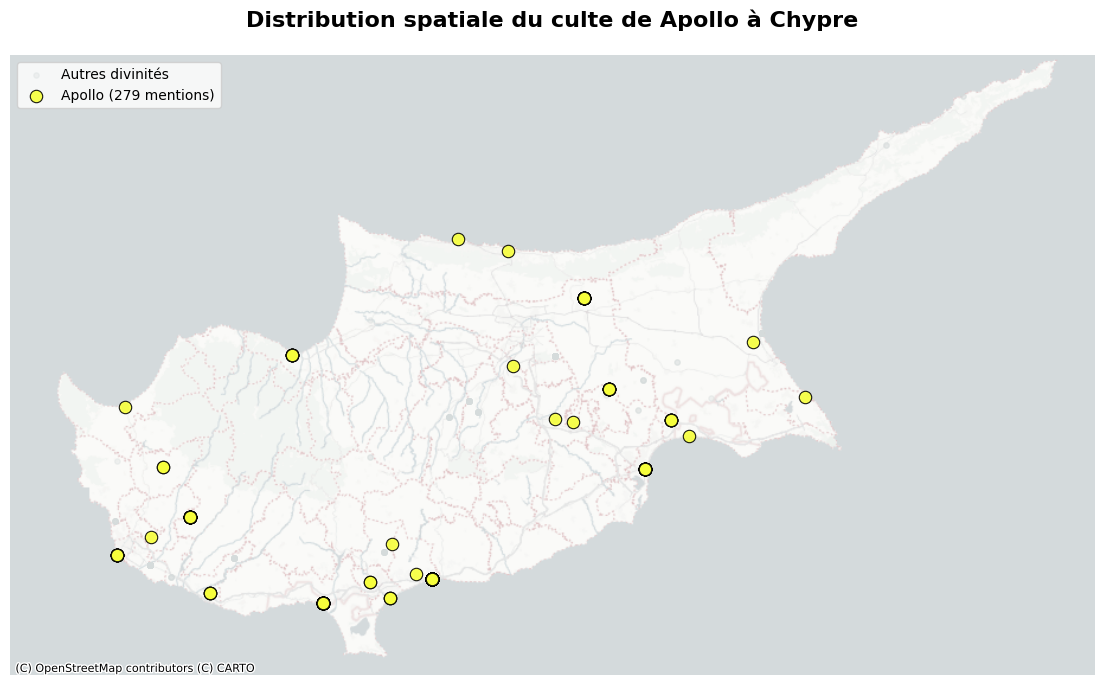

In [ ]:

divinite_cible = "Apollo"
couleur_focus = "#f7ff3c"

if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

ax.scatter(
    df_cultes.geometry.x, df_cultes.geometry.y,
    color='#d5dbdb', s=15, alpha=0.3, label='Autres divinités', zorder=1
)

subset = df_cultes[df_cultes['Divinite'] == divinite_cible]

if not subset.empty:
    ax.scatter(
        subset.geometry.x, subset.geometry.y,
        color=couleur_focus,
        s=80,
        alpha=0.9,
        edgecolors='black',
        linewidth=0.8,
        label=f"{divinite_cible} ({len(subset)} mentions)",
        zorder=3
    )
else:
    print(f"Attention : Aucune donnée trouvée pour {divinite_cible}")

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution spatiale du culte de {divinite_cible} à Chypre",
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

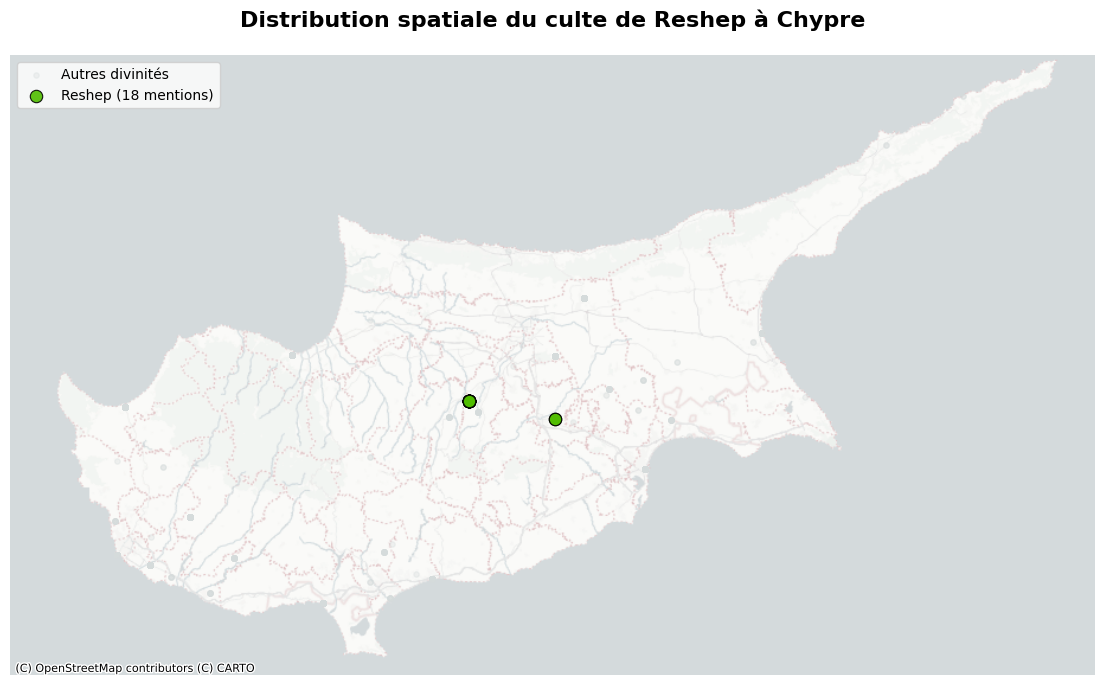

In [ ]:


divinite_cible = "Reshep"
couleur_focus = "#50bd00"

if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

ax.scatter(
    df_cultes.geometry.x, df_cultes.geometry.y,
    color='#d5dbdb', s=15, alpha=0.3, label='Autres divinités', zorder=1
)

subset = df_cultes[df_cultes['Divinite'] == divinite_cible]

if not subset.empty:
    ax.scatter(
        subset.geometry.x, subset.geometry.y,
        color=couleur_focus,
        s=80,
        alpha=0.9,
        edgecolors='black',
        linewidth=0.8,
        label=f"{divinite_cible} ({len(subset)} mentions)",
        zorder=3
    )
else:
    print(f"Attention : Aucune donnée trouvée pour {divinite_cible}")

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution spatiale du culte de {divinite_cible} à Chypre",
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

In [ ]:


divinite_cible = "Nymph"
couleur_focus = "#f000ec"

if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

ax.scatter(
    df_cultes.geometry.x, df_cultes.geometry.y,
    color='#d5dbdb', s=15, alpha=0.3, label='Autres divinités', zorder=1
)

subset = df_cultes[df_cultes['Divinite'] == divinite_cible]

if not subset.empty:
    ax.scatter(
        subset.geometry.x, subset.geometry.y,
        color=couleur_focus,
        s=80,
        alpha=0.9,
        edgecolors='black',
        linewidth=0.8,
        label=f"{divinite_cible} ({len(subset)} mentions)",
        zorder=3
    )
else:
    print(f"Attention : Aucune donnée trouvée pour {divinite_cible}")

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution spatiale du culte de {divinite_cible} à Chypre",
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

In [ ]:


divinite_cible = "Arsinoe"
couleur_focus = "#f000ec"

if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

ax.scatter(
    df_cultes.geometry.x, df_cultes.geometry.y,
    color='#d5dbdb', s=15, alpha=0.3, label='Autres divinités', zorder=1
)

subset = df_cultes[df_cultes['Divinite'] == divinite_cible]

if not subset.empty:
    ax.scatter(
        subset.geometry.x, subset.geometry.y,
        color=couleur_focus,
        s=80,
        alpha=0.9,
        edgecolors='black',
        linewidth=0.8,
        label=f"{divinite_cible} ({len(subset)} mentions)",
        zorder=3
    )
else:
    print(f"Attention : Aucune donnée trouvée pour {divinite_cible}")

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution spatiale du culte de {divinite_cible} à Chypre",
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

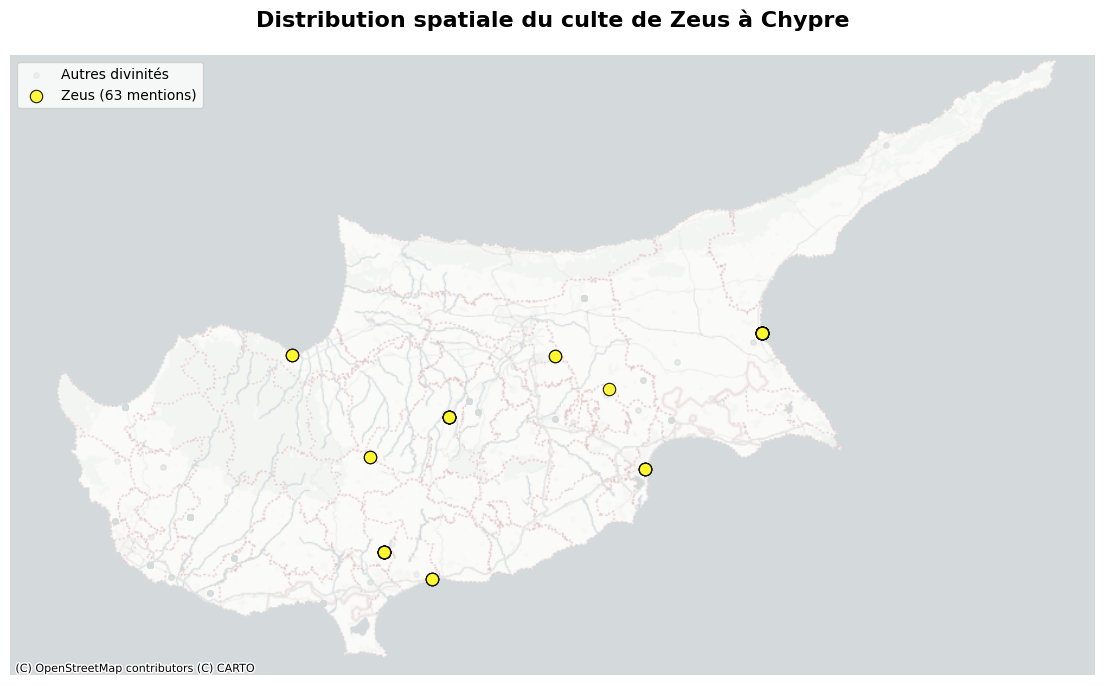

In [ ]:


divinite_cible = "Zeus"
couleur_focus = "#fff72e"

if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

ax.scatter(
    df_cultes.geometry.x, df_cultes.geometry.y,
    color='#d5dbdb', s=15, alpha=0.3, label='Autres divinités', zorder=1
)

subset = df_cultes[df_cultes['Divinite'] == divinite_cible]

if not subset.empty:
    ax.scatter(
        subset.geometry.x, subset.geometry.y,
        color=couleur_focus,
        s=80,
        alpha=0.9,
        edgecolors='black',
        linewidth=0.8,
        label=f"{divinite_cible} ({len(subset)} mentions)",
        zorder=3
    )
else:
    print(f"Attention : Aucune donnée trouvée pour {divinite_cible}")

ax.legend(loc='upper left', frameon=True)
ax.set_title(f"Distribution spatiale du culte de {divinite_cible} à Chypre",
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.show()

-------------

Site et leur divinité préférée

-----------

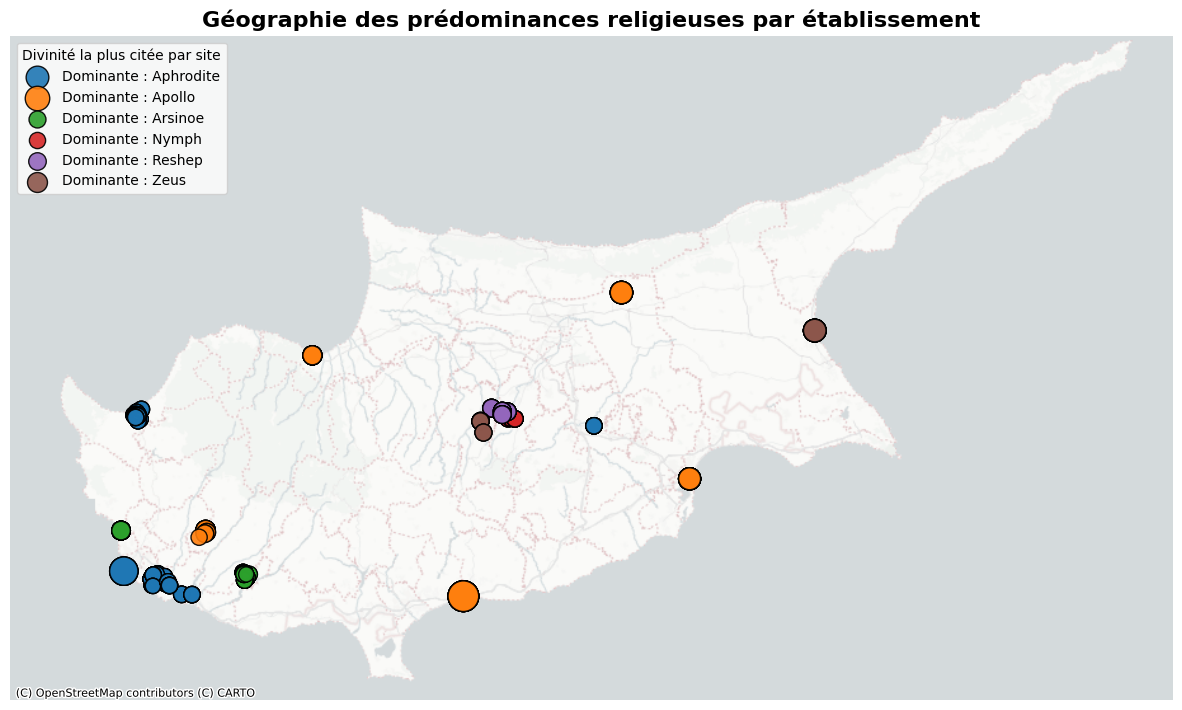

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely import wkt
import numpy as np

if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

mode_par_site = (df_cultes.groupby(['Settlement_ID', 'Divinite'])
                 .size()
                 .reset_index(name='nb_mentions')
                 .sort_values(['Settlement_ID', 'nb_mentions'], ascending=[True, False])
                 .drop_duplicates('Settlement_ID'))

df_sites_div = gdf_settlement.merge(mode_par_site, left_on='ID', right_on='Settlement_ID', how='inner')

if not isinstance(df_sites_div, gpd.GeoDataFrame):
    df_sites_div['geometry'] = df_sites_div['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_sites_div = gpd.GeoDataFrame(df_sites_div, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 12), facecolor='white')
ax.set_aspect('equal')
ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

divinites = sorted(df_sites_div['Divinite'].unique())
colormap = plt.get_cmap('tab10')
mapping_couleurs = {div: colormap(i % 10) for i, div in enumerate(divinites)}

for div in divinites:
    subset = df_sites_div[df_sites_div['Divinite'] == div]
    if not subset.empty:
        m_sizes = 80 + (np.sqrt(subset['nb_mentions']) * 40)

        ax.scatter(
            subset.geometry.x, subset.geometry.y,
            color=mapping_couleurs[div],
            s=m_sizes,
            alpha=0.9,
            edgecolors='black',
            linewidth=1,
            label=f"Dominante : {div}",
            zorder=3
        )

ax.legend(title="Divinité la plus citée par site", loc='upper left', frameon=True)
ax.set_title("Géographie des prédominances religieuses par établissement", fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()

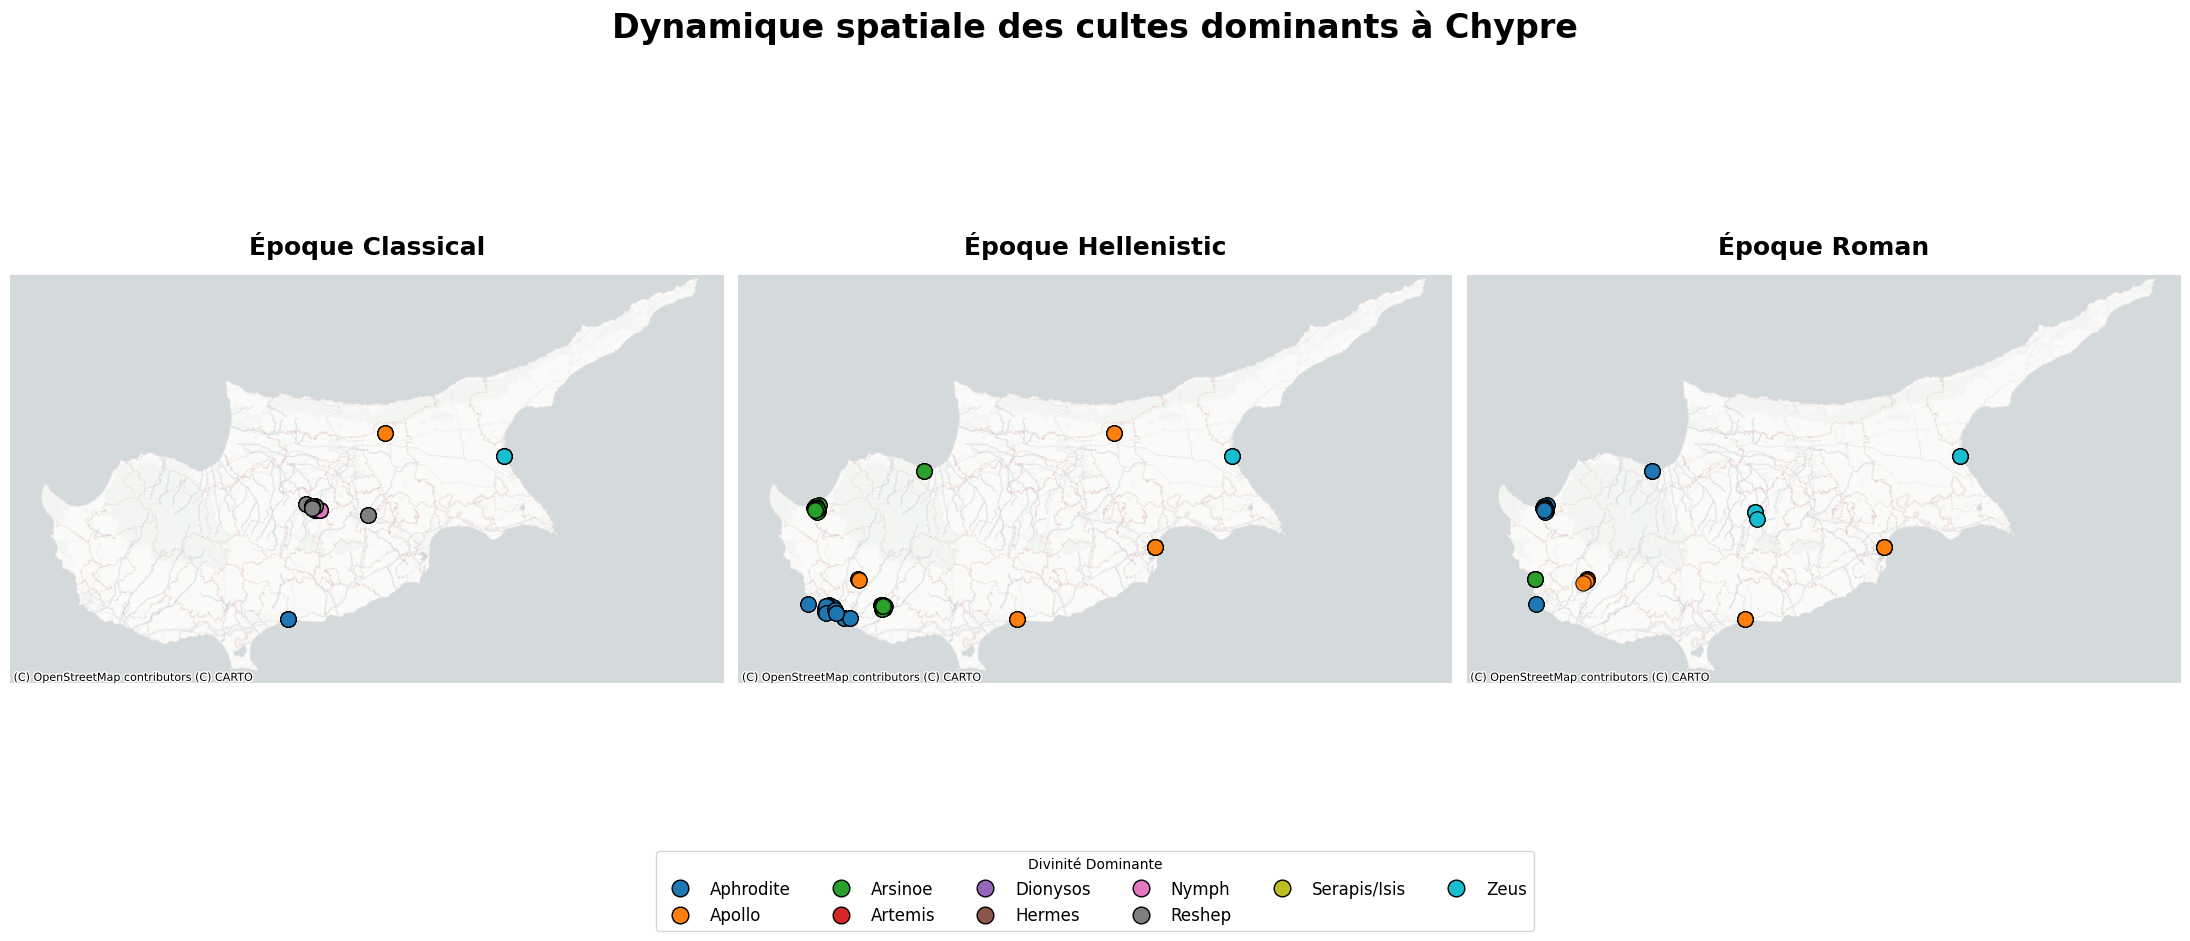

In [ ]:


if not isinstance(df_cultes, gpd.GeoDataFrame):
    if df_cultes['geometry'].dtype == object:
        df_cultes['geometry'] = df_cultes['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    df_cultes = gpd.GeoDataFrame(df_cultes, geometry='geometry', crs="EPSG:3857")

epoques = ['Classical', 'Hellenistic', 'Roman']

fig, axes = plt.subplots(1, 3, figsize=(22, 10), facecolor='white')
axes = axes.flatten()

divinites_global = sorted(df_cultes['Divinite'].unique())
colormap = plt.get_cmap('tab10')
mapping_couleurs = {div: colormap(i % 10) for i, div in enumerate(divinites_global)}

for i, epoque in enumerate(epoques):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.set_xlim(3580000, 3860000)
    ax.set_ylim(4100000, 4260000)

    try:
        cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)
    except:
        ax.set_facecolor('#f0f0f0')

    df_ep = df_cultes[df_cultes['Date'] == epoque]

    if not df_ep.empty:
        mode_ep = (df_ep.groupby(['Settlement_ID', 'Divinite'])
                   .size()
                   .reset_index(name='count')
                   .sort_values(['Settlement_ID', 'count'], ascending=[True, False])
                   .drop_duplicates('Settlement_ID'))

        df_sites_ep = gdf_settlement.merge(mode_ep, left_on='ID', right_on='Settlement_ID')

        for div in mode_ep['Divinite'].unique():
            subset = df_sites_ep[df_sites_ep['Divinite'] == div]
            if not subset.empty:
                geom = subset['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
                temp_gdf = gpd.GeoDataFrame(subset, geometry=geom, crs="EPSG:4326").to_crs(epsg=3857)

                ax.scatter(
                    temp_gdf.geometry.x, temp_gdf.geometry.y,
                    color=mapping_couleurs[div],
                    s=120, alpha=0.9, edgecolors='black', linewidth=0.8,
                    zorder=3
                )

    ax.set_title(f"Époque {epoque}", fontsize=18, fontweight='bold', pad=15)
    ax.set_axis_off()

patches = [plt.plot([],[], marker="o", ms=12, ls="", mec='black',
            color=mapping_couleurs[d], label=d)[0] for d in divinites_global]

fig.legend(handles=patches, title="Divinité Dominante", loc='lower center',
           ncol=len(divinites_global)//2 + 1, bbox_to_anchor=(0.5, 0.05), fontsize=12)

plt.suptitle("Dynamique spatiale des cultes dominants à Chypre", fontsize=24, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.12, 1, 0.95])
plt.show()

----------

Dédicaces et épitaphes

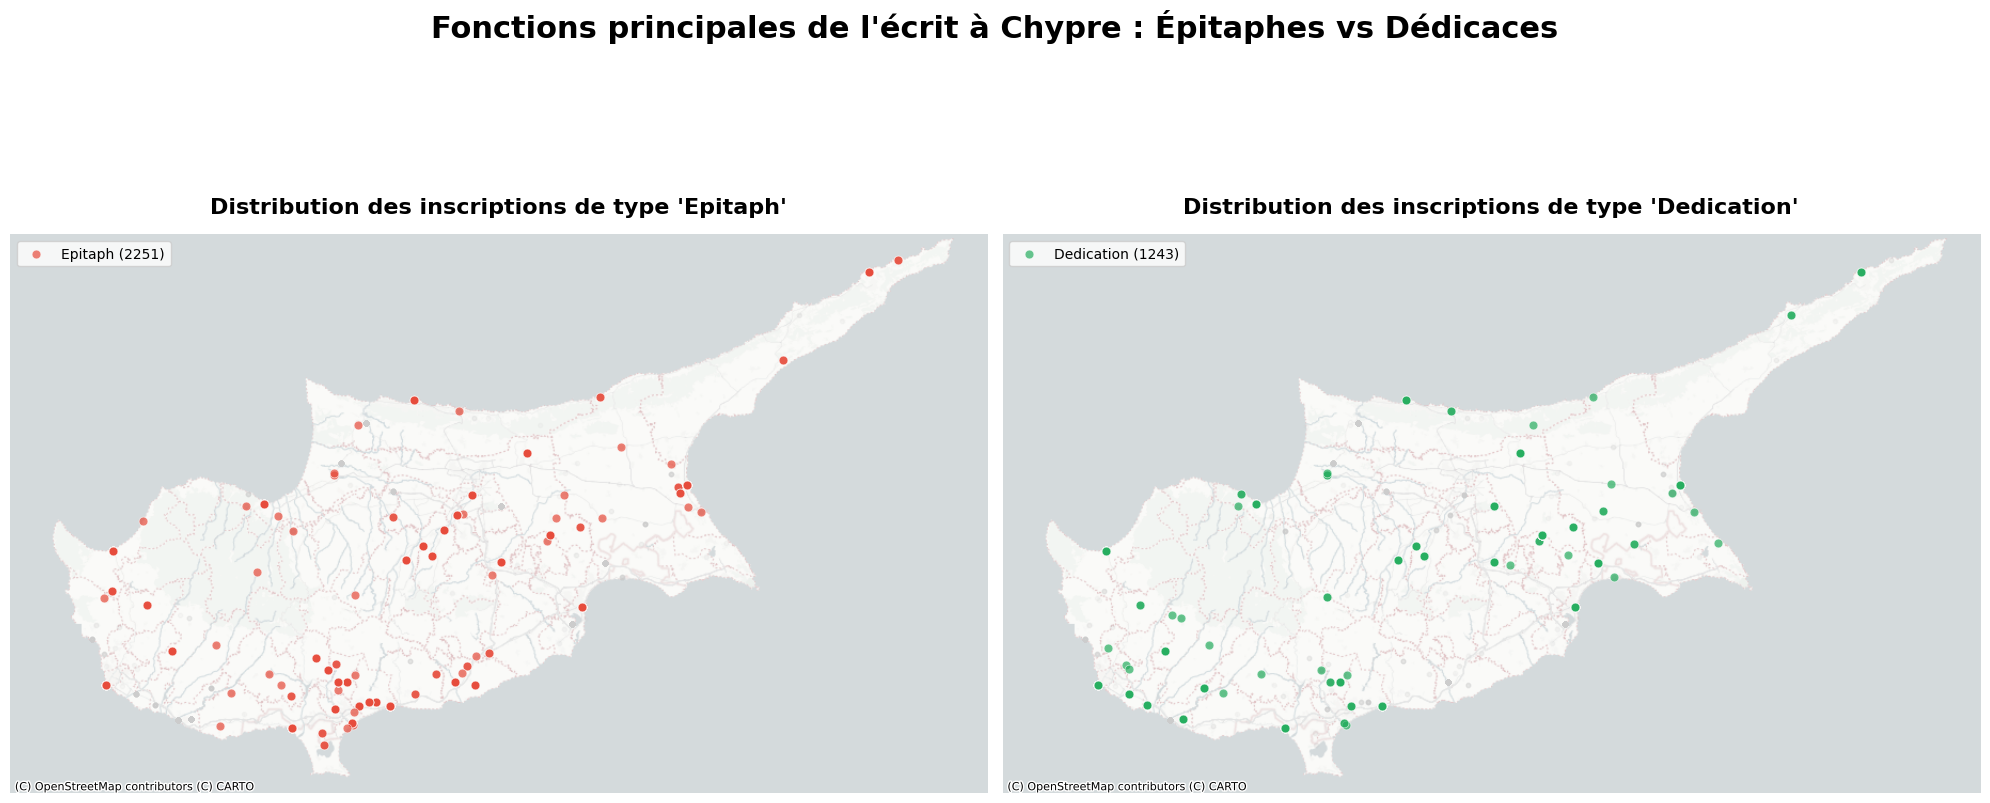

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely import wkt
import numpy as np

if not isinstance(gdf_inscriptions, gpd.GeoDataFrame):
    if gdf_inscriptions['geometry'].dtype == object:
        gdf_inscriptions['geometry'] = gdf_inscriptions['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    gdf_inscriptions_webmercator = gpd.GeoDataFrame(gdf_inscriptions, geometry='geometry', crs="EPSG:3857")

categories_focus = {
    "Epitaph": {"keywords": ['epitaph', 'tomb', 'burial', 'grave'], "color": "#e74c3c"}, # Rouge pour le funéraire
    "Dedication": {"keywords": ['dedication', 'votive', 'dedicated', 'vow'], "color": "#27ae60"} # Vert pour le sacré/civique
}

fig, axes = plt.subplots(1, 2, figsize=(20, 10), facecolor='white')
axes = axes.flatten()

for i, (cat_name, cat_data) in enumerate(categories_focus.items()):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.set_xlim(3580000, 3860000)
    ax.set_ylim(4100000, 4260000)

    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

    keywords_regex = '|'.join(cat_data["keywords"])
    mask = gdf_inscriptions_webmercator['Nature'].str.contains(keywords_regex, case=False, na=False)

    subset = gdf_inscriptions_webmercator[mask]

    ax.scatter(
        gdf_inscriptions_webmercator.geometry.x, gdf_inscriptions_webmercator.geometry.y,
        color='#cccccc', s=10, alpha=0.1, zorder=1
    )

    if not subset.empty:
        ax.scatter(
            subset.geometry.x, subset.geometry.y,
            color=cat_data["color"],
            s=40,
            alpha=0.7,
            edgecolors='white',
            linewidth=0.5,
            label=f"{cat_name} ({len(subset)})",
            zorder=3
        )

    ax.set_title(f"Distribution des inscriptions de type '{cat_name}'", fontsize=16, fontweight='bold', pad=15)
    ax.legend(loc='upper left', frameon=True)
    ax.set_axis_off()

plt.suptitle("Fonctions principales de l'écrit à Chypre : Épitaphes vs Dédicaces", fontsize=22, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

-------------

Pistes d'analyse linguistique

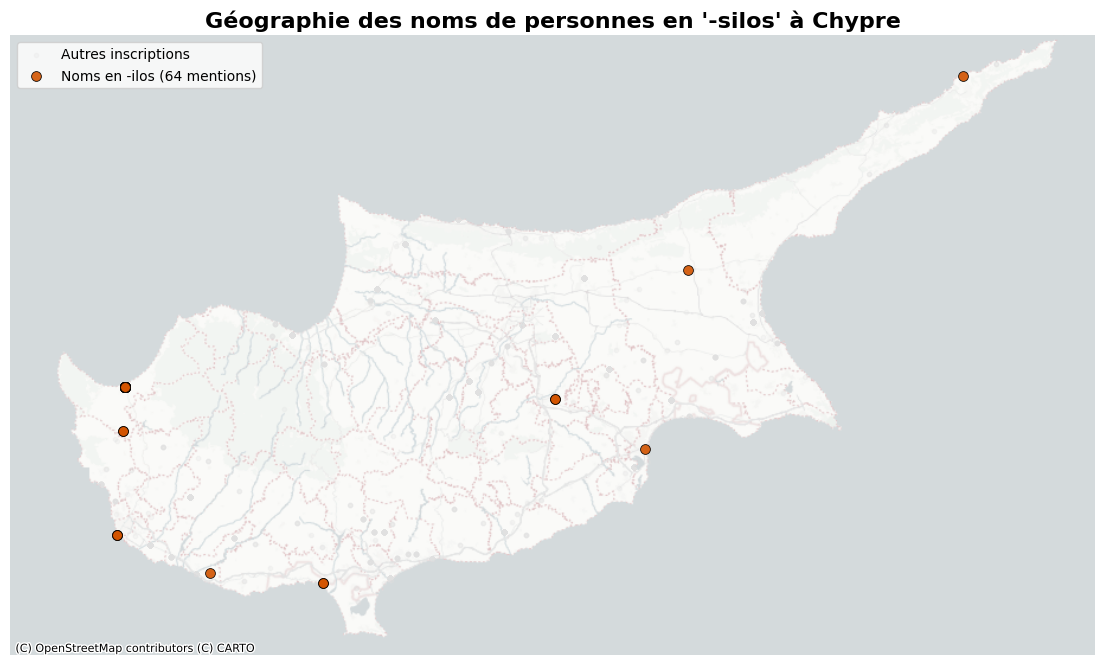

Exemples de noms trouvés :
['Onasilos' 'Onesilos']


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely import wkt

if not isinstance(gdf_inscriptions_webmercator, gpd.GeoDataFrame):
    if gdf_inscriptions_webmercator['geometry'].dtype == object:
        gdf_inscriptions_webmercator['geometry'] = gdf_inscriptions_webmercator['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    gdf_inscriptions_webmercator = gpd.GeoDataFrame(gdf_inscriptions_webmercator, geometry='geometry', crs="EPSG:3857")

pattern = r'\w+silos\b'
mask_ilos = gdf_inscriptions_webmercator['Nature'].str.contains(pattern, case=False, na=False)
df_ilos = gdf_inscriptions_webmercator[mask_ilos].copy()

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)

ax.scatter(
    gdf_inscriptions_webmercator.geometry.x, gdf_inscriptions_webmercator.geometry.y,
    color='#e0e0e0', s=10, alpha=0.2, label='Autres inscriptions', zorder=1
)

if not df_ilos.empty:
    ax.scatter(
        df_ilos.geometry.x, df_ilos.geometry.y,
        color='#d35400', s=50, alpha=0.9,
        edgecolors='black', linewidth=0.6,
        label=f"Noms en -ilos ({len(df_ilos)} mentions)", zorder=3
    )

ax.set_title(f"Géographie des noms de personnes en '-silos' à Chypre", fontsize=16, fontweight='bold')
ax.legend(loc='upper left', frameon=True)
ax.set_axis_off()

plt.show()

print("Exemples de noms trouvés :")
print(df_ilos['Nature'].str.extract(f'({pattern})', expand=False).unique())

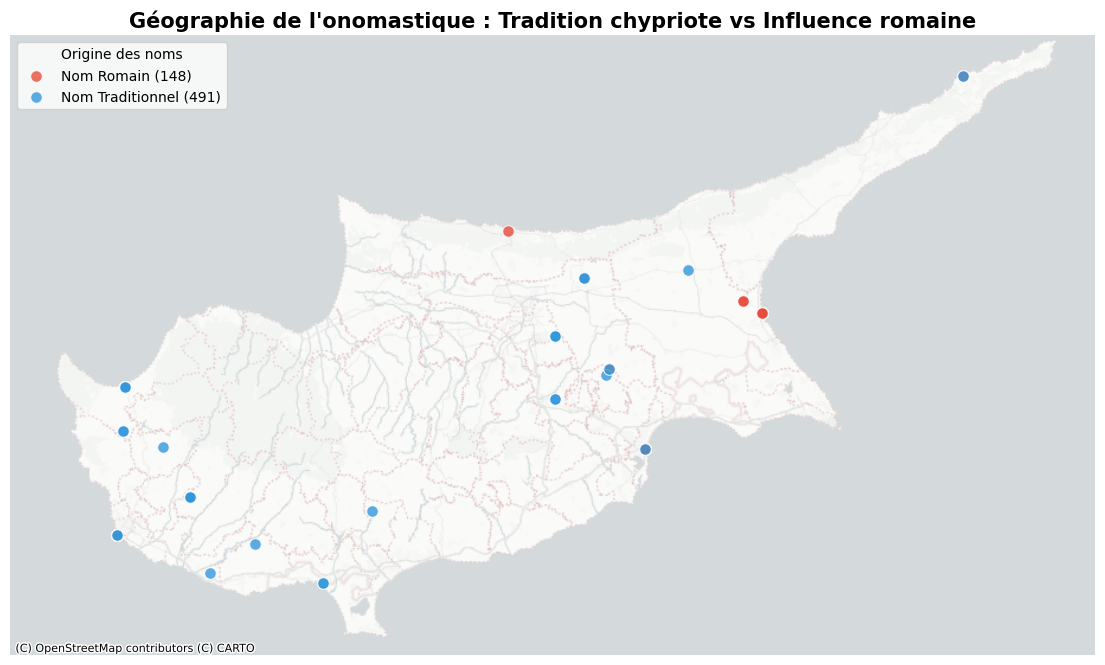

In [ ]:


noms_trad = ['onesagoras', 'stasiwoikos', 'onasilos', 'timagoras']
noms_romains = ['claudius', 'gaius', 'veranianus', 'imperial']

def type_nom(text):
    t = str(text).lower()
    if any(n in t for n in noms_romains): return 'Romain'
    if any(n in t for n in noms_trad): return 'Traditionnel'
    return None

if not isinstance(gdf_inscriptions_webmercator, gpd.GeoDataFrame):
    gdf_inscriptions_webmercator['geometry'] = gdf_inscriptions_webmercator['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
    gdf_inscriptions_webmercator = gpd.GeoDataFrame(gdf_inscriptions_webmercator, geometry='geometry', crs="EPSG:3857")

gdf_inscriptions_webmercator['Origine_Nom'] = gdf_inscriptions_webmercator['Nature'].apply(type_nom)
df_nom_map = gdf_inscriptions_webmercator.dropna(subset=['Origine_Nom']).copy()

if 'gdf_settlement' in locals():
    if not isinstance(gdf_settlement, gpd.GeoDataFrame):
        geom_settle = gdf_settlement['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)
        gdf_settlement = gpd.GeoDataFrame(gdf_settlement, geometry=geom_settle, crs="EPSG:4326")

    gdf_bg = gdf_settlement.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_aspect('equal')


couleurs = {'Romain': '#e74c3c', 'Traditionnel': '#3498db'}

for origine, color in couleurs.items():
    subset = df_nom_map[df_nom_map['Origine_Nom'] == origine]
    if not subset.empty:
        ax.scatter(
            subset.geometry.x, subset.geometry.y,
            color=color, s=70, alpha=0.8, edgecolors='white',
            linewidth=0.8, label=f"Nom {origine} ({len(subset)})", zorder=3
        )

ax.set_xlim(3580000, 3860000)
ax.set_ylim(4100000, 4260000)

try:
    cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zorder=0)
except:
    pass

ax.legend(title="Origine des noms", loc='upper left', frameon=True)
ax.set_title("Géographie de l'onomastique : Tradition chypriote vs Influence romaine", fontsize=15, fontweight='bold')
ax.set_axis_off()

plt.show()